In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Define Path

path = r'/Users/umachidambaram/June-2021 Instacart Basket Analysis'

In [5]:
# Data set Orders Products Customers

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'orders_products_customer4_9.pkl'))

2. The columns First Name, Last Name, income, n_dependants, fam_status and age are PII data.

In [5]:
df_ords_prods_cust.dtypes

user_id                      int64
First Name                  object
Last Name                   object
Gender                      object
STATE                       object
Age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
Unnamed: 0_x                 int64
product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
Unnamed: 0_y                 int64
order_id                     int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
_merge                    category
price_range_loc             object
busiest_day                 object
Busiest days                object
busiest_period_of_da

In [6]:
df = df_ords_prods_cust.drop(columns = ['First Name', 'Last Name','Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

In [7]:
df.head()

user_id  Gender     STATE  Age date_joined  n_dependants fam_status  \
0    26711  Female  Missouri   48    1/1/2017             3    married   
1    26711  Female  Missouri   48    1/1/2017             3    married   
2    26711  Female  Missouri   48    1/1/2017             3    married   
3    26711  Female  Missouri   48    1/1/2017             3    married   
4    26711  Female  Missouri   48    1/1/2017             3    married   

   income  product_id product_name  ...    price_range_loc     busiest_day  \
0  165665         196         Soda  ...                NaN  Regularly busy   
1  165665         196         Soda  ...                NaN  Regularly busy   
2  165665         196         Soda  ...                NaN  Regularly busy   
3  165665        6184  Clementines  ...  Low-range product  Regularly busy   
4  165665        6184  Clementines  ...  Low-range product  Regularly busy   

         Busiest days  busiest_period_of_day  max_order  loyalty_flag  \
0        Busiest day2          Fewest orders          8  New customer   
1      Regularly busy          Fewest orders          8  New customer   
2        Busiest day2          Fewest orders          8  New customer   
3      Regularly busy          Fewest orders          8  New customer   
4  Least busiest day2          Fewest orders          8  New customer   

   average_price      Spender  Frequency_order    Frequency_Flag  
0       7.988889  Low spender             19.0  Regular customer  
1       7.988889  Low spender             19.0  Regular customer  
2       7.988889  Low spender             19.0  Regular customer  
3       7.988889  Low spender             19.0  Regular customer  
4       7.988889  Low spender             19.0  Regular customer  

[5 rows x 31 columns]

3. State Column

In [8]:
df['STATE'].value_counts(dropna= False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [7]:
# Result for Region column

Region = []

for var in df["STATE"]:
    if ((var == 'Maine') | (var == 'New Hampshire') | (var == 'Vermont') | (var == 'Massachusetts') | (var =='Rhode Island') | (var =='Connecticut') | (var == 'New York') | (var == 'Pennsylvania') | (var == 'New Jersey')):
        Region.append("Northeast")
    elif ((var == 'Wisconsin') | (var == 'Michigan') | (var == 'Illinois') | (var =='Indiana') | (var =='Ohio') | (var == 'North Dakota') | (var =='South Dakota') | (var =='Nebraska') | (var =='Kansas') | (var == 'Minnesota') | (var == 'Iowa') | (var =='Missouri')):
        Region.append("Midwest")
    elif ((var == 'Delaware') | (var == 'Maryland') | (var == 'District of Columbia') | (var == 'Virginia') | (var =='West Virginia') | (var =='North Carolina') | (var =='South Carolina') | (var =='Georgia') | (var == 'Florida') | (var =='Kentucky') |(var == 'Tennessee') | (var == 'Mississippi') | (var =='Alabama') | (var == 'Oklahoma') | (var =='Texas') | (var =='Arkansas') | (var == 'Louisiana')):
        Region.append("South")
    else:
        Region.append("West")
    
     

In [8]:
# Create Region column

df['Region'] = Region

In [11]:
# Check frequency of Region column

df['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [9]:
# Check average price of order in Regions

df.groupby(['Region']).agg({'prices':['mean']})

prices
                mean
Region              
Midwest    12.715483
Northeast  11.554997
South      12.195577
West       11.319834

In [13]:
# Sum of Number of orders by region

df.groupby(['Region']).agg({'order_number':['sum']})

order_number
                   sum
Region                
Midwest      128585728
Northeast     98521079
South        185091277
West         143295881

In [14]:
# Days since previous order by region

df.groupby(['Region']).agg({'days_since_prior_order':['median']})

days_since_prior_order
                          median
Region                          
Midwest                      8.0
Northeast                    8.0
South                        8.0
West                         8.0

In [15]:
# Orders hour of day by region

df.groupby(['Region']).agg({'order_hour_of_day':['median']})

order_hour_of_day
                     median
Region                     
Midwest                  13
Northeast                13
South                    13
West                     13

Midwest is spending 27% when South is spending 26% on the average. South is making 33% of orders when midwest is making 23% of orders.

In [16]:
# 4. Low activity customers

df.shape

(32404859, 32)

In [10]:
df.loc[df['order_number'] < 5, 'activity_category'] = 'Low activity'

In [11]:
df.loc[df['order_number'] >= 5, 'activity_category'] = 'High activity'

In [19]:
df['activity_category'].value_counts(dropna = False)

High activity    24414877
Low activity      7989982
Name: activity_category, dtype: int64

In [12]:
# Create dataframe with customers of low activity

df_LowActivity = df[df['activity_category'] == 'Low activity']

In [47]:
df_LowActivity.shape

(7989982, 37)

In [21]:
# Export Low activity customers

df_LowActivity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'customers_LowActivity.pkl'))

In [13]:
# Drop low activity customers on dataframe

df = df[df['activity_category'] == 'High activity']

In [23]:
df.shape

(24414877, 33)

In [24]:
df.head()

user_id  Gender     STATE  Age date_joined  n_dependants fam_status  \
0    26711  Female  Missouri   48    1/1/2017             3    married   
1    26711  Female  Missouri   48    1/1/2017             3    married   
2    26711  Female  Missouri   48    1/1/2017             3    married   
6    26711  Female  Missouri   48    1/1/2017             3    married   
7    26711  Female  Missouri   48    1/1/2017             3    married   

   income  product_id product_name  ...    Busiest days  \
0  165665         196         Soda  ...    Busiest day2   
1  165665         196         Soda  ...  Regularly busy   
2  165665         196         Soda  ...    Busiest day2   
6  165665        6184  Clementines  ...    Busiest day2   
7  165665        6184  Clementines  ...    Busiest day2   

   busiest_period_of_day  max_order  loyalty_flag  average_price      Spender  \
0          Fewest orders          8  New customer       7.988889  Low spender   
1          Fewest orders          8  New customer       7.988889  Low spender   
2          Fewest orders          8  New customer       7.988889  Low spender   
6          Fewest orders          8  New customer       7.988889  Low spender   
7          Fewest orders          8  New customer       7.988889  Low spender   

   Frequency_order    Frequency_Flag   Region  activity_category  
0             19.0  Regular customer  Midwest      High activity  
1             19.0  Regular customer  Midwest      High activity  
2             19.0  Regular customer  Midwest      High activity  
6             19.0  Regular customer  Midwest      High activity  
7             19.0  Regular customer  Midwest      High activity  

[5 rows x 33 columns]

In [14]:
# 5. Customer profiles

# a) Income

df.loc[df['income'] < 75000, 'income_Range'] = 'Low income'

In [156]:
df.loc[(df['income'] >= 75000) & (df['income'] < 150000), 'income_Range'] = 'Average lowincome'

In [157]:
df.loc[(df['income'] >= 150000) & (df['income'] < 300000), 'income_Range'] = 'Average highincome'

In [158]:
df.loc[df['income'] > 300000, 'income_Range'] = 'High income'

In [159]:
df['income_Range'].value_counts()

Average lowincome     13559237
Low income             7768565
Average highincome     3003888
High income              83187
Name: income_Range, dtype: int64

In [160]:
salary =pd.crosstab(df['user_id'], df['income_Range'], dropna=False )

In [161]:
salary

income_Range  Average highincome  Average lowincome  High income  Low income
user_id                                                                     
1                              0                  0            0          38
2                              0                  0            0         158
3                              0                 58            0           0
4                              0                  0            0           3
7                              0                133            0           0
...                          ...                ...          ...         ...
206203                         0                 20            0           0
206206                         0                274            0           0
206207                         0                159            0           0
206208                       633                  0            0           0
206209                         0                 76            0           0

[162631 rows x 4 columns]

In [162]:
# Export income profile into Prepared data. 

salary.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'incomeprofile.csv'))

In [18]:
# Age profile

df.loc[df['Age'] < 25, 'Age_Range'] = 'age18-25'

In [19]:
df.loc[(df['Age'] >= 25) & (df['Age'] < 45), 'Age_Range'] = 'age25-45'

In [20]:
df.loc[(df['Age'] >= 45) & (df['Age'] < 60), 'Age_Range'] = 'age45-60'

In [21]:
df.loc[df['Age'] > 60, 'Age_Range'] = 'age60-81'

In [41]:
df['Age_Range'].value_counts()

age60-81    7968859
age25-45    7626948
age45-60    5762598
age18-25    2694733
Name: Age_Range, dtype: int64

In [75]:
AgeRange =pd.crosstab(df['user_id'], df['Age_Range'], dropna=False )

In [59]:
AgeRange

Age_Range  age18-25  age25-45  age45-60  age60-81
user_id                                          
1                 0        38         0         0
2                 0         0         0       158
3                 0        58         0         0
4                 0         3         0         0
7                 0       133         0         0
...             ...       ...       ...       ...
206203            0         0         0        20
206206            0       274         0         0
206207            0         0         0       159
206208            0         0         0       633
206209            0         0         0        76

[160147 rows x 4 columns]

In [60]:
# Export age profile into Prepared data. 

AgeRange.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'Ageprofile.csv'))

In [239]:
# Family Status profile

def family_status(row):
    
    if row['fam_status'] == 'married' & row['n_dependants'] == 0:
        return 'married none'
    elif row['fam_status'] == 'married' & row['n_dependants'] == 1:
        return 'married one'
    elif row['fam_status'] == 'married' & row['n_dependants'] == 2:
        return 'married two'
    elif row['fam_status'] == 'married' & row['n_dependants'] == 3:
        return 'married three'
    elif row['fam_status'] == 'married' & row['department_id'] == 18:
        return 'married babies'
    else: return 'Not enough data'

In [244]:
def family_status(row):
   
    if row['fam_status'] == 'single' & row['n_dependants'] == 0:
        return 'single none'
    elif row['fam_status'] == 'single' & row['n_dependants'] == 1:
        return 'single one'
    elif row['fam_status'] == 'single' & row['n_dependants'] == 2:
        return 'single two'
    elif row['fam_status'] == 'single' & row['n_dependants'] == 3:
        return 'single three'
    elif row['fam_status'] == 'single' & row['department_id'] == 18:
        return 'single babies'
    else: return 'Not enough data'

In [1]:
df['family_status'] = df.apply(family_status, axis =1)

NameError: name 'df' is not defined

In [228]:
df['family_status2'] = df.apply(family_status2, axis =1)

In [229]:
df['family_status'].value_counts(dropna= False)

married    17138476
none        6105002
one          403721
three        386910
two          380768
Name: family_status, dtype: int64

In [231]:
df['family_status2'].value_counts(dropna= False)

three     6133537
two       6094231
one       6082107
single    4015790
none      2089212
Name: family_status2, dtype: int64

In [233]:
family_status =pd.crosstab(df['user_id'], df['family_status'], dropna=False )

In [234]:
family_status

family_status  married  none  one  three  two
user_id                                      
1                   38     0    0      0    0
2                  158     0    0      0    0
3                   58     0    0      0    0
4                    3     0    0      0    0
7                  133     0    0      0    0
...                ...   ...  ...    ...  ...
206203              20     0    0      0    0
206206             274     0    0      0    0
206207             159     0    0      0    0
206208             633     0    0      0    0
206209              76     0    0      0    0

[162631 rows x 5 columns]

In [235]:
family_status2 =pd.crosstab(df['user_id'], df['family_status2'], dropna=False )
family_status2

family_status2  none  one  single  three  two
user_id                                      
1                  0    0       0     38    0
2                  0    0       0    158    0
3                  0    0       0     58    0
4                  0    0       0      3    0
7                  0    0       0      0  133
...              ...  ...     ...    ...  ...
206203             0    0       0     20    0
206206             0    0       0      0  274
206207             0  159       0      0    0
206208             0  633       0      0    0
206209             0    0       0     76    0

[162631 rows x 5 columns]

In [236]:
# Export family Status profile into Prepared data. 

family_status.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'familyStatusprofile.csv'))
family_status2.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'familyStatus2profile.csv'))

In [237]:
# Diet profile: department id 12 - meat and seafood, 16 - dairy and eggs, 20 - deli

def diet(row):
    
    if (row['department_id'] == 1) | (row['department_id'] == 2) | (row['department_id'] == 3) | (row['department_id'] == 4) | (row['department_id'] == 5) | (row['department_id'] == 6) | (row['department_id'] == 7) | (row['department_id'] == 8) | (row['department_id'] == 9) | (row['department_id'] == 10) | (row['department_id'] == 11) | (row['department_id'] == 12)| (row['department_id'] == 13) | (row['department_id'] == 14) | (row['department_id'] == 15)| (row['department_id'] == 16) | (row['department_id'] == 17)| (row['department_id'] == 18) | (row['department_id'] == 19) | (row['department_id'] == 20) | (row['department_id'] == 21) :
        return 'carnivore'
    elif  (row['department_id'] != 12):
        return 'vegetarian'
    elif   (row['department_id'] != 12) & (row['department_id'] != 16)  & (row['department_id'] != 20) :
        return 'vegan'
    else: return np.nan

In [238]:
df['diet'].value_counts(dropna= False)

vegan         18987488
vegetarian     4903499
carnivore       523890
Name: diet, dtype: int64

In [26]:
df['diet'] = df.apply(diet, axis =1)

In [147]:
diet =pd.crosstab(df['user_id'], df['department_id'], dropna=False )
diet

department_id  1   2   3    4   5   6   7   8   9   10  ...  12  13  14  15  \
user_id                                                 ...                   
1               0   0   0    4   0   0   9   0   0   0  ...   0   0   2   0   
2              14   0   2   26   0   3   7   0   0   0  ...   1  10   3   1   
3               4   0   0   26   0   0   2   0   4   0  ...   0   3   0   0   
4               0   0   0    0   0   0   0   0   0   0  ...   0   0   0   0   
7               3   0   1   47   0   0  30   1   0   0  ...   5   7   0   3   
...            ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
206203          4   0   0    1   0   0   3   0   0   0  ...   0   1   0   2   
206206         71   1   2   34   0   3  31   0   1   0  ...   2  14   1   9   
206207         10   0   2   36   0   0  14   0   3   0  ...   3  10   2   6   
206208         24   0  57  181   0   2  20   0  16   0  ...  21  36  17  11   
206209          2   0   5   11   0   0   7   0   3   0  ...   0   4   6   2   

department_id   16  17  18  19  20  21  
user_id                                 
1               10   0   0  13   0   0  
2               46   0   0  33  11   0  
3               15   0   0   3   1   0  
4                0   0   0   1   2   0  
7               21   0   0  10   5   0  
...            ...  ..  ..  ..  ..  ..  
206203           1   1   0   7   0   0  
206206          37  11   0  42   5   0  
206207          50   0   1  14   8   0  
206208         151   6   3  56  25   2  
206209          15  10   0   8   3   0  

[162631 rows x 21 columns]

In [148]:
# Export diet profile into Prepared data. 

diet.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'Dietprofile.csv'))

In [163]:

plt.gcf().subplots_adjust(bottom=0.15)
incomebar = df['income_Range'].value_counts().plot.bar()

In [179]:
# Export

incomebar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile.png'))

In [149]:

plt.gcf().subplots_adjust(bottom=0.25)
dietbar = df['diet'].value_counts().plot.bar()

In [178]:
# Export

dietbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_profile.png'))

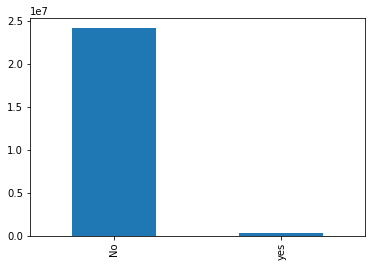

In [33]:

plt.gcf().subplots_adjust(bottom=0.35)
babiesbar = df['babies'].value_counts().plot.bar()

In [177]:
# Export

babiesbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'babies_profile.png'))

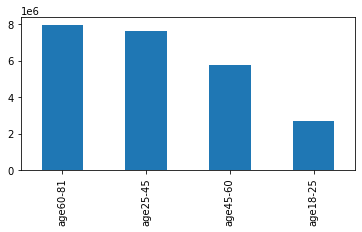

In [90]:
plt.gcf().subplots_adjust(bottom=0.35)
Agebar = df['Age_Range'].value_counts().plot.bar()

In [176]:
# Export

Agebar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile.png'))

In [35]:
# Customers with pets profile

def pet(row):
    
    if row['department_id'] == 8:
        return 'Pet'
    else: return 'NoPet'

In [37]:
df['pet'] = df.apply(pet, axis =1)

In [38]:
df['pet'].value_counts(dropna= False)

NoPet    24342766
Pet         72111
Name: pet, dtype: int64

In [39]:
pet =pd.crosstab(df['user_id'], df['pet'], dropna=False )
pet

pet      NoPet  Pet
user_id            
1           38    0
2          158    0
3           58    0
4            3    0
7          132    1
...        ...  ...
206203      20    0
206206     274    0
206207     159    0
206208     633    0
206209      76    0

[162631 rows x 2 columns]

In [69]:
# Export pet profile into Prepared data. 

pet.to_csv(os.path.join(path, '02 Data', 'Prepared Data ', 'Petprofile.csv'))

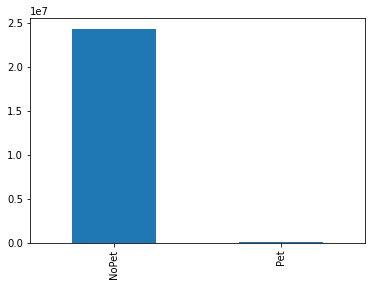

In [93]:
plt.gcf().subplots_adjust(bottom=0.1)
Petbar = df['pet'].value_counts().sort_index().plot.bar()

In [175]:
# Export

Petbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_profile.png'))

In [164]:
salary.shape

(162631, 4)

In [71]:
pet.shape

(162631, 2)

In [72]:
babies.shape

(162631, 2)

In [73]:
diet.shape

(162631, 3)

In [76]:
AgeRange.shape

(160147, 4)

In [80]:
df.head()

user_id  Gender     STATE  Age date_joined  n_dependants fam_status  \
0    26711  Female  Missouri   48    1/1/2017             3    married   
1    26711  Female  Missouri   48    1/1/2017             3    married   
2    26711  Female  Missouri   48    1/1/2017             3    married   
6    26711  Female  Missouri   48    1/1/2017             3    married   
7    26711  Female  Missouri   48    1/1/2017             3    married   

   income  product_id product_name  ...      Spender  Frequency_order  \
0  165665         196         Soda  ...  Low spender             19.0   
1  165665         196         Soda  ...  Low spender             19.0   
2  165665         196         Soda  ...  Low spender             19.0   
6  165665        6184  Clementines  ...  Low spender             19.0   
7  165665        6184  Clementines  ...  Low spender             19.0   

     Frequency_Flag   Region  activity_category       income_Range  Age_Range  \
0  Regular customer  Midwest      High activity  Average lowincome   age45-60   
1  Regular customer  Midwest      High activity  Average lowincome   age45-60   
2  Regular customer  Midwest      High activity  Average lowincome   age45-60   
6  Regular customer  Midwest      High activity  Average lowincome   age45-60   
7  Regular customer  Midwest      High activity  Average lowincome   age45-60   

   babies   diet    pet  
0      No  vegan  NoPet  
1      No  vegan  NoPet  
2      No  vegan  NoPet  
6      No  vegan  NoPet  
7      No  vegan  NoPet  

[5 rows x 38 columns]

In [96]:
# 7. Stats on customer profile

df.groupby('pet').agg({'Age':['mean', 'min', 'max']})

Age        
            mean min max
pet                     
NoPet  49.457348  18  81
Pet    49.453884  18  81

Age of pet owners and no pet owners do not vary  

In [98]:
df.groupby('babies').agg({'income':['mean', 'min', 'max']})

income               
                 mean    min     max
babies                              
No       99863.153150  25903  593901
yes     102181.238142  25991  579169

Average income of customers with babies is more than without babies

In [150]:
df.groupby('diet').agg({'prices':['mean', 'min', 'max']})

prices              
                 mean  min      max
diet                               
carnivore   16.299581  8.0     25.0
vegan        7.436203  1.0     20.0
vegetarian  28.358257  1.0  99999.0

Vegetarians spend more in purchaces and carnivores follow. Maximum of 99999 is an outlier.

In [151]:
df.groupby('diet').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                             mean  min   max
diet                                        
carnivore               10.375413  0.0  30.0
vegan                   10.087788  0.0  30.0
vegetarian              10.044341  0.0  30.0

carnivores order slightly more often than others.

In [102]:
df.groupby('Age').agg({'income':['mean', 'min', 'max']})

income               
              mean    min     max
Age                              
18    70811.794906  26067  357226
19    69958.756068  25972  396364
20    71294.637958  26024  338939
21    70897.402588  25937  372571
22    69896.375293  26070  369192
..             ...    ...     ...
77   117633.098160  30031  512331
78   118029.967716  29113  381735
79   115740.428254  29330  579169
80   114176.328236  30290  569253
81   115526.537132  29834  571932

[64 rows x 3 columns]

Older customers seem to earn more, as well as customers with higher income seem to use instacart

In [103]:
df.groupby('Age_Range').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                       mean min max
Age_Range                          
age18-25          13.333389   0  23
age25-45          13.360474   0  23
age45-60          13.372699   0  23
age60-81          13.363380   0  23

The latest time for order is 11:00 PM and on the average it is 1:00 PM 

In [104]:
# 8. Profiles by region

#Pet Profile by region
pet_region=pd.crosstab(df['Region'],df['pet'], dropna=False )
pet_region

pet          NoPet    Pet
Region                   
Midwest    5695275  16481
Northeast  4301191  14080
South      8106074  23012
West       6240226  18538

South has more pet owners as well as no pet owners (More customers from south).

In [105]:
#Pet Profile by department
pet_department=pd.crosstab(df['department_id'],df['pet'], dropna=False )
pet_department

pet              NoPet    Pet
department_id                
1              1627614      0
2                27166      0
3               883330      0
4              7227091      0
5               107972      0
6               197900      0
7              2036447      0
8                    0  72111
9               633725      0
10               27558      0
11              328480      0
12              523890      0
13             1385375      0
14              524945      0
15              787790      0
16             4120488      0
17              539349      0
18              335947      0
19             2187121      0
20              783011      0
21               57567      0

In [152]:
#Diet Profile by Region
diet_region=pd.crosstab(df['Region'],df['diet'], dropna=False )
diet_region

diet       carnivore    vegan  vegetarian
Region                                   
Midwest       122137  4444584     1145035
Northeast      92309  3353655      869307
South         173933  6323889     1631264
West          135511  4865360     1257893

South shows higher numbers on diet due to higher number of customers. No difference in diet with region

In [153]:
#Diet Profile by department
diet_department=pd.crosstab(df['department_id'],df['diet'], dropna=False )
diet_department

diet           carnivore    vegan  vegetarian
department_id                                
1                      0  1627614           0
2                      0    27166           0
3                      0   883330           0
4                      0  7227091           0
5                      0   107972           0
6                      0   197900           0
7                      0  2036447           0
8                      0    72111           0
9                      0   633725           0
10                     0    27558           0
11                     0   328480           0
12                523890        0           0
13                     0  1385375           0
14                     0   524945           0
15                     0   787790           0
16                     0        0     4120488
17                     0   539349           0
18                     0   335947           0
19                     0  2187121           0
20                     0        0      783011
21                     0    57567           0

In [118]:
#age profile by region
age_region=pd.crosstab(df['Region'],df['Age'], dropna=False )
age_region

Age            18      19      20      21      22      23      24      25  \
Region                                                                      
Midwest     80987   86661   97911   85819  104762   87048   80172   83772   
Northeast   62974   75714   61405   69977   68306   77159   62266   60976   
South      128565  132070  128048  140107  122344  133603  134631  117897   
West       103712   98090   88032   92509   93860   93161  104840   90332   

Age            26      27  ...      72      73      74      75      76  \
Region                     ...                                           
Midwest     83982  103725  ...   80101   95136   79215   88233   91850   
Northeast   66866   71562  ...   71014   66623   63529   76432   63945   
South      137729  125707  ...  123799  131738  130640  123082  126791   
West        98459   97051  ...  103256  102142  101220  105932   93734   

Age            77      78      79      80      81  
Region                                             
Midwest     84151   80905   91789   85916   99166  
Northeast   74476   66580   71537   72831   61123  
South      120468  128497  151027  125783  118320  
West        94092   94757   87932  106363  102925  

[4 rows x 64 columns]

In [120]:
#age profile by region
ageprofile_region=pd.crosstab(df['Region'],df['Age_Range'], dropna=False )
ageprofile_region

Age_Range  age18-25  age25-45  age45-60  age60-81
Region                                           
Midwest      623360   1797346   1366998   1848183
Northeast    477801   1322852   1024952   1429900
South        919368   2560809   1874052   2649272
West         674204   1945941   1496596   2041504

South has 33% of customers over 60 and West has 25%. South has 33% of customers in all age group and west has 26%.

In [121]:
#age profile by department
ageprofile_department=pd.crosstab(df['department_id'],df['Age_Range'], dropna=False )
ageprofile_department

Age_Range      age18-25  age25-45  age45-60  age60-81
department_id                                        
1                179519    502874    385943    535510
2                  3119      8433      6489      8732
3                 97443    276363    208181    288338
4                796076   2263433   1698558   2359636
5                 13152     32730     26768     33910
6                 22071     62488     46683     63677
7                221178    628245    486642    669721
8                  8757     21952     16656     23877
9                 70900    197852    149411    206092
10                 3123      8569      6428      9014
11                36048    102412     79077    106071
12                58665    161899    122874    172510
13               153083    431777    327108    451674
14                59393    163330    124217    169917
15                86764    247459    186245    255876
16               456966   1293699    969113   1342033
17                59392    168081    126537    177217
18                37112    105444     80258    108563
19               239844    685950    518045    711502
20                85515    246088    183580    256704
21                 6613     17870     13785     18285

In [165]:
#Income Profile by Region
income_region=pd.crosstab(df['Region'],df['income_Range'], dropna=False )
income_region

income_Range  Average highincome  Average lowincome  High income  Low income
Region                                                                      
Midwest                   700621            3188260        26093     1796782
Northeast                 523937            2420464        12782     1358088
South                     997095            4504436        25927     2601628
West                      782235            3446077        18385     2012067

South makes 33% of the income amnd West 28%. 50% of customers are in the average low income category and 27% are in the low income category.

In [166]:
#Income Profile by department
income_department=pd.crosstab(df['department_id'],df['income_Range'], dropna=False )
income_department

income_Range   Average highincome  Average lowincome  High income  Low income
department_id                                                                
1                          207999             912460         6296      500859
2                            3506              15026          140        8494
3                          113906             498300         4018      267106
4                          888180            4121436        17002     2200473
5                           16288              56975         2438       32271
6                           24753             113964          720       58463
7                          242165            1067738         7893      718651
8                            9550              40423          618       21520
9                           80317             368239         2309      182860
10                           2956              14803            5        9794
11                          40439             181326         1282      105433
12                          69752             315011         1908      137219
13                         176253             784583         5198      419341
14                          63991             276594         1984      182376
15                         100595             456144         3152      227899
16                         512388            2325644        13825     1268631
17                          68301             290350         3909      176789
18                          43140             198710          571       93526
19                         235674            1052282         7464      891701
20                          96495             437470         2366      246680
21                           7240              31759           89       18479

In [167]:
#Income Profile by Region
babies_region=pd.crosstab(df['Region'],df['babies'], dropna=False )
babies

babies    No  yes
user_id          
1         38    0
2        158    0
3         58    0
4          3    0
7        133    0
...      ...  ...
206203    20    0
206206   274    0
206207   158    1
206208   630    3
206209    76    0

[162631 rows x 2 columns]

In [141]:
#babies Profile by department
babies_department=pd.crosstab(df['department_id'],df['babies'], dropna=False )
babies_department

babies              No     yes
department_id                 
1              1627614       0
2                27166       0
3               883330       0
4              7227091       0
5               107972       0
6               197900       0
7              2036447       0
8                72111       0
9               633725       0
10               27558       0
11              328480       0
12              523890       0
13             1385375       0
14              524945       0
15              787790       0
16             4120488       0
17              539349       0
18                   0  335947
19             2187121       0
20              783011       0
21               57567       0

In [116]:
#Prices Profile by hour
prices_hourofday=pd.crosstab(df['prices'],df['order_hour_of_day'], dropna=False )
prices_hourofday

order_hour_of_day    0     1    2    3    4    5     6      7      8      9   \
prices                                                                         
1.0                 580   262  166  139  148  242   726   2403   4291   6229   
1.1                1299   639  387  272  296  562  1765   5445  10492  14304   
1.2                1177   606  368  283  334  557  1599   5014   9867  13976   
1.3                2099  1105  646  397  552  934  3293  10012  18725  26014   
1.4                1980   998  587  392  465  838  2720   8889  16777  23776   
...                 ...   ...  ...  ...  ...  ...   ...    ...    ...    ...   
24.8                  2     1    1    2    1    1     2      3     15     17   
24.9                 26    12   10    7    6   14    57    142    240    298   
25.0                 76    24   21   10   13   29   116    296    535    710   
14900.0              16    12   10    7    7   12    31     82    150    222   
99999.0               2     0    3    0    0    1     5     18     36     40   

order_hour_of_day  ...     14     15     16     17     18     19    20    21  \
prices             ...                                                         
1.0                ...   7293   7243   6837   5762   4513   3345  2597  2040   
1.1                ...  14984  14757  13969  11522   9030   7207  5764  4851   
1.2                ...  15641  15350  14597  12000   9114   6939  5425  4512   
1.3                ...  26495  25762  24453  19865  15985  12307  9733  8268   
1.4                ...  25099  24376  22496  18211  13988  10691  8778  7673   
...                ...    ...    ...    ...    ...    ...    ...   ...   ...   
24.8               ...     17     26     31     19     12      5     8     9   
24.9               ...    370    378    331    277    227    165   136    77   
25.0               ...    810    901    809    699    476    345   277   229   
14900.0            ...    249    270    277    235    183    143    93    72   
99999.0            ...     43     46     45     39     22     22    13     7   

order_hour_of_day    22    23  
prices                         
1.0                1618   994  
1.1                3856  2453  
1.2                3447  2170  
1.3                6545  4118  
1.4                6057  3739  
...                 ...   ...  
24.8                  9     5  
24.9                 63    35  
25.0                212   112  
14900.0              48    22  
99999.0               4     3  

[242 rows x 24 columns]

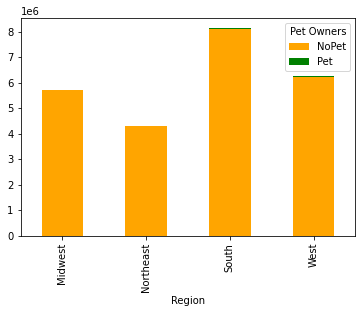

In [128]:
# 9. Charts

#pet and regions stacked bar
pet_region_profile= pet_region.plot.bar(stacked= True, color =['orange', 'green'])
plt.legend(title='Pet Owners')

In [174]:
# Export

pet_region_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_profile.png'))

In [129]:
#pet and department stacked bar
pet_department_profile= pet_department.plot.bar(stacked= True, color = ['orange', 'green'])
plt.legend(title='Pet department')

In [173]:
# Export

pet_department_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_department_profile.png'))

In [142]:
# Prices per hour line graph
price_hour_line= sns.lineplot(data= df, x= 'order_hour_of_day', y= 'prices', color = 'red')

In [172]:
# Export

price_hour_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_hour_of_order.png'))

In [154]:
#diet and regions stacked bar
diet_region_profile= diet_region.plot.bar(stacked= True, color =['red', 'orange', 'yellow'])
plt.legend(title='Diet')

In [171]:
# Export

diet_region_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_region_profile.png'))

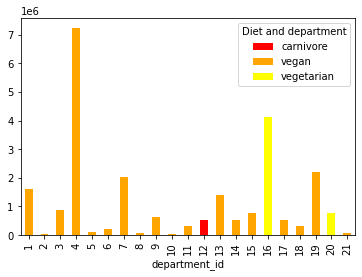

In [155]:
#diet and department stacked bar
diet_department_profile= diet_department.plot.bar(stacked= True, color =['red', 'orange', 'yellow'])
plt.legend(title='Diet and department')

In [ ]:
# Export

diet_department_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_department_profile.png'))

In [168]:
#income and regions stacked bar
income_region_profile= income_region.plot.bar(stacked= True, color =['red','orange', 'green', 'yellow'])
plt.legend(title='income')

In [170]:
# Export

income_region_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_profile.png'))

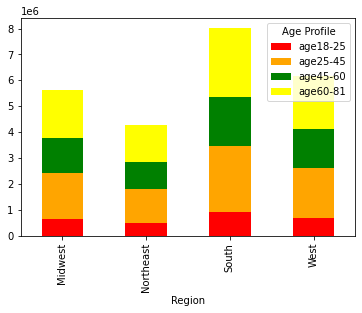

In [138]:
#age and regions stacked bar
age_region_profile= ageprofile_region.plot.bar(stacked= True, color =['red','orange', 'green','yellow'])
plt.legend(title='Age Profile')

In [169]:
# Export

age_region_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_profile.png'))

In [185]:
# Orders as family

family_order=pd.crosstab(df['days_since_prior_order'],df['fam_status'], dropna=False )
family_order


fam_status              divorced/widowed  living with parents and siblings  \
days_since_prior_order                                                       
0.0                                36682                             19837   
1.0                                73843                             40925   
2.0                               116325                             64384   
3.0                               145328                             80604   
4.0                               160392                             89009   
5.0                               158474                             89995   
6.0                               184437                            104279   
7.0                               248621                            142489   
8.0                               136162                             77853   
9.0                                85107                             47398   
10.0                               68268                             37802   
11.0                               56497                             30285   
12.0                               51629                             28941   
13.0                               56386                             30733   
14.0                               67647                             38700   
15.0                               43466                             24141   
16.0                               28896                             16209   
17.0                               24279                             14278   
18.0                               22269                             11571   
19.0                               20362                             11875   
20.0                               23569                             12700   
21.0                               26292                             15457   
22.0                               17427                             10791   
23.0                               13594                              7606   
24.0                               11305                              6722   
25.0                               11404                              5937   
26.0                               10317                              5530   
27.0                               12159                              6380   
28.0                               14257                              8499   
29.0                               10427                              5488   
30.0                              153391                             84981   

fam_status              married  single  
days_since_prior_order                   
0.0                      268862   63987  
1.0                      594629  141443  
2.0                      928276  218119  
3.0                     1188358  276877  
4.0                     1296527  303586  
5.0                     1300231  308491  
6.0                     1516857  353729  
7.0                     2067067  483966  
8.0                     1130216  262431  
9.0                      703299  164469  
10.0                     548507  130440  
11.0                     460718  109808  
12.0                     431610   99707  
13.0                     467401  107803  
14.0                     555249  131464  
15.0                     362563   82974  
16.0                     244925   58413  
17.0                     201481   47450  
18.0                     183978   43365  
19.0                     173633   41257  
20.0                     195218   45776  
21.0                     222799   53415  
22.0                     157336   37186  
23.0                     112298   25475  
24.0                      96978   22797  
25.0                      88546   20139  
26.0                      88152   19796  
27.0                      99114   22259  
28.0                     121382   27004  
29.0                      83241   19528  
30.0                    1249025  292636

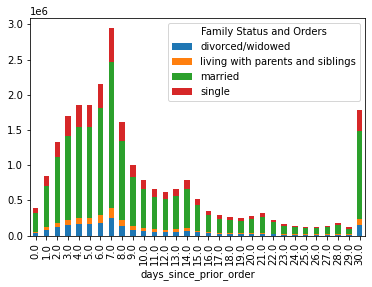

In [186]:
familyorders_bar= family_order.plot.bar(stacked= True)
plt.legend(title='Family Status and Orders')

In [187]:
# Export

familyorders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'familyOrders.png'))

In [188]:
# age and orders
age_orders=pd.crosstab(df['days_since_prior_order'],df['Age_Range'], dropna=False )
age_orders

Age_Range               age18-25  age25-45  age45-60  age60-81
days_since_prior_order                                        
0.0                        45158    115684     93334    128095
1.0                        95504    261994    201400    278949
2.0                       147156    410815    315291    433345
3.0                       188299    522446    398812    556078
4.0                       203861    572280    435316    610209
5.0                       204076    577884    440467    608081
6.0                       237977    674746    510041    704885
7.0                       326203    930896    684353    960796
8.0                       178288    504874    380132    520485
9.0                       111145    311599    237169    326199
10.0                       86122    245152    185921    256348
11.0                       71607    209087    155775    211033
12.0                       66860    195506    144210    196650
13.0                       72445    208761    158367    212608
14.0                       87957    246636    185970    261306
15.0                       55270    161940    122270    165766
16.0                       38349    110550     83104    111210
17.0                       32532     89832     67001     93609
18.0                       27208     82601     61904     85560
19.0                       27692     77722     58160     80210
20.0                       30189     86616     65147     90947
21.0                       35554     99184     74272    104326
22.0                       24439     68792     54111     71950
23.0                       17536     49960     38107     50986
24.0                       15702     43517     32960     43342
25.0                       13433     39662     30227     40914
26.0                       13102     39430     28597     40843
27.0                       14837     43421     33636     45797
28.0                       18872     53629     40098     55954
29.0                       12773     38074     27205     38861
30.0                      194587    553658    419241    583517

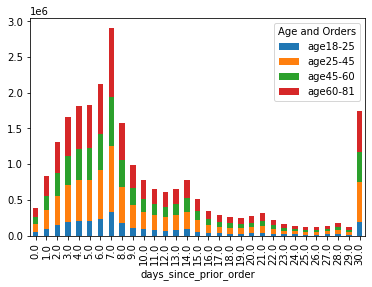

In [189]:
ageorders_bar = age_orders.plot.bar(stacked= True)
plt.legend(title='Age and Orders')

In [190]:
# Export

ageorders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ageOrders.png'))

In [193]:
#family and loyalty
family_loyalty=pd.crosstab(df['fam_status'],df['loyalty_flag'], dropna=False )
family_loyalty

loyalty_flag                      Loyal customer  New customer  \
fam_status                                                       
divorced/widowed                          820006        177928   
living with parents and siblings          457558         97698   
married                                  6691990       1488311   
single                                   1585937        350891   

loyalty_flag                      Regular customer  
fam_status                                          
divorced/widowed                           1091278  
living with parents and siblings            616143  
married                                    8958175  
single                                     2078962

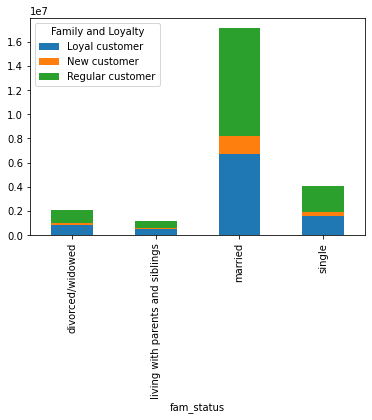

In [194]:
# Family and Loyalty bar

familyloyalty_bar = family_loyalty.plot.bar(stacked= True)
plt.legend(title='Family and Loyalty')

In [195]:
# Export

familyloyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FamilyLoyalty.png'))

In [197]:
#income and loyalty 

income_loyalty=pd.crosstab(df['income_Range'],df['loyalty_flag'], dropna=False )
income_loyalty

loyalty_flag        Loyal customer  New customer  Regular customer
income_Range                                                      
Average highincome         1181697        251043           1571148
Average lowincome          5325532       1146547           7087158
High income                  37640          3569             41978
Low income                 3010622        713669           4044274

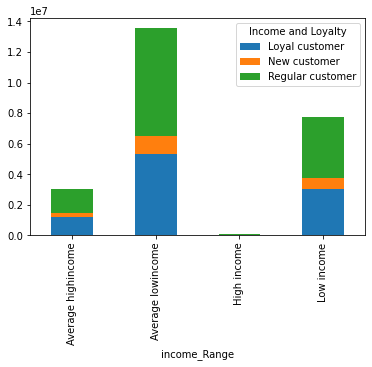

In [198]:
# Income and Loyalty bar

incomeloyalty = income_loyalty.plot.bar(stacked= True)
plt.legend(title='Income and Loyalty')